In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt


In [2]:
grupos = pd.read_csv(f"munic_grupo.csv")
grupos.columns = ["CODMUNRES", "grupo"]
grupos

,CODMUNRES,grupo
0,310020,2.0
1,310320,2.0
2,310390,3.0
3,310480,3.0
4,310500,3.0
...,...,...
95,316553,1.0
96,316660,3.0
97,316720,2.0
98,316890,3.0


In [3]:
df = pd.read_csv(f"coeficientes_2.csv")
df.columns

Index(['CODMUNRES', 'ano', 'nascimentos', 'obitos_<1ano', 'obitos_<=6dias',
       'obitos_7a27dias', 'obitos_0a27dias', 'obitos_28a364dias',
       'obitos_fetais', 'obitos_capI', 'obitos_capIV', 'obitos_capV',
       'obitos_capVII', 'obitos_capIX', 'obitos_capX', 'obitos_capXII',
       'obitos_capXIV', 'obitos_capXVI', 'obitos_capXX', 'obitos_capOutros',
       'obitos_maternos', 'obitos', 'tx_mort_infantil', 'tx_mort_neonatal',
       'tx_mort_neonatalpre', 'tx_mort_neonataltardia', 'tx_mort_neonatalpos',
       'tx_mort_perinatal', 'razao_mort_materna', 'mort_prop_capI',
       'mort_prop_capIV', 'mort_prop_capV', 'mort_prop_capVII',
       'mort_prop_capIX', 'mort_prop_capX', 'mort_prop_capXII',
       'mort_prop_capXIV', 'mort_prop_capXVI', 'mort_prop_capXX',
       'mort_prop_capOutros'],
      dtype='object')

In [4]:
df['soma_obitos_caps'] = (df['obitos_capI'] + df['obitos_capIV'] + df['obitos_capV'] +
       df['obitos_capVII'] + df['obitos_capIX'] + df['obitos_capX'] + df['obitos_capXII'] +
       df['obitos_capXIV'] + df['obitos_capXVI'] + df['obitos_capXX'])
df

,CODMUNRES,ano,nascimentos,obitos_<1ano,obitos_<=6dias,obitos_7a27dias,obitos_0a27dias,obitos_28a364dias,obitos_fetais,obitos_capI,...,mort_prop_capV,mort_prop_capVII,mort_prop_capIX,mort_prop_capX,mort_prop_capXII,mort_prop_capXIV,mort_prop_capXVI,mort_prop_capXX,mort_prop_capOutros,soma_obitos_caps
0,310020,2010,220,6.0,3.0,1.0,4.0,2.0,4.0,3.0,...,1.744186,0.0,19.767442,6.976744,0.581395,1.162791,0.581395,1.744186,56.976744,74.0
1,310020,2011,224,2.0,2.0,0.0,2.0,0.0,2.0,5.0,...,3.496503,0.0,16.083916,7.692308,0.000000,1.398601,0.000000,2.097902,60.839161,56.0
2,310020,2012,238,5.0,5.0,0.0,5.0,0.0,3.0,6.0,...,1.621622,0.0,18.918919,5.405405,0.000000,0.540541,0.540541,5.405405,62.162162,70.0
3,310020,2013,268,5.0,4.0,1.0,5.0,0.0,5.0,12.0,...,0.543478,0.0,17.391304,6.521739,0.543478,2.173913,0.543478,1.630435,59.239130,75.0
4,310020,2014,260,0.0,0.0,0.0,0.0,0.0,4.0,3.0,...,0.000000,0.0,25.000000,6.875000,0.000000,0.625000,0.000000,1.250000,60.000000,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,317120,2015,2058,17.0,8.0,1.0,9.0,8.0,18.0,6.0,...,0.701754,0.0,15.087719,2.807018,0.701754,0.000000,0.350877,4.561404,73.508772,151.0
996,317120,2016,1920,15.0,8.0,2.0,10.0,5.0,28.0,6.0,...,1.957295,0.0,18.505338,2.491103,0.889680,0.533808,0.177936,3.558719,67.793594,181.0
997,317120,2017,1954,24.0,14.0,2.0,16.0,8.0,28.0,7.0,...,1.818182,0.0,14.727273,4.909091,1.090909,0.181818,0.000000,2.363636,69.636364,167.0
998,317120,2018,1859,27.0,15.0,5.0,20.0,7.0,17.0,8.0,...,3.208556,0.0,18.181818,4.099822,0.891266,0.356506,0.534759,5.347594,62.745098,209.0


In [5]:
df = df.drop(['nascimentos', 'obitos_<1ano', 'obitos_<=6dias',
       'obitos_7a27dias', 'obitos_0a27dias', 'obitos_28a364dias',
       'obitos_fetais', 'obitos_capI', 'obitos_capIV', 'obitos_capV',
       'obitos_capVII', 'obitos_capIX', 'obitos_capX', 'obitos_capXII',
       'obitos_capXIV', 'obitos_capXVI', 'obitos_capXX', 'obitos_maternos',
       'obitos',], axis=1)
df

,CODMUNRES,ano,obitos_capOutros,tx_mort_infantil,tx_mort_neonatal,tx_mort_neonatalpre,tx_mort_neonataltardia,tx_mort_neonatalpos,tx_mort_perinatal,razao_mort_materna,...,mort_prop_capV,mort_prop_capVII,mort_prop_capIX,mort_prop_capX,mort_prop_capXII,mort_prop_capXIV,mort_prop_capXVI,mort_prop_capXX,mort_prop_capOutros,soma_obitos_caps
0,310020,2010,98.0,27.272727,18.181818,13.636364,4.545455,9.090909,31.818182,0.000000,...,1.744186,0.0,19.767442,6.976744,0.581395,1.162791,0.581395,1.744186,56.976744,74.0
1,310020,2011,87.0,8.928571,8.928571,8.928571,0.000000,0.000000,17.857143,0.000000,...,3.496503,0.0,16.083916,7.692308,0.000000,1.398601,0.000000,2.097902,60.839161,56.0
2,310020,2012,115.0,21.008403,21.008403,21.008403,0.000000,0.000000,33.613445,0.000000,...,1.621622,0.0,18.918919,5.405405,0.000000,0.540541,0.540541,5.405405,62.162162,70.0
3,310020,2013,109.0,18.656716,18.656716,14.925373,3.731343,0.000000,33.582090,0.000000,...,0.543478,0.0,17.391304,6.521739,0.543478,2.173913,0.543478,1.630435,59.239130,75.0
4,310020,2014,96.0,0.000000,0.000000,0.000000,0.000000,0.000000,15.384615,0.000000,...,0.000000,0.0,25.000000,6.875000,0.000000,0.625000,0.000000,1.250000,60.000000,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,317120,2015,419.0,8.260447,4.373178,3.887269,0.485909,3.887269,12.633625,48.590865,...,0.701754,0.0,15.087719,2.807018,0.701754,0.000000,0.350877,4.561404,73.508772,151.0
996,317120,2016,381.0,7.812500,5.208333,4.166667,1.041667,2.604167,18.750000,0.000000,...,1.957295,0.0,18.505338,2.491103,0.889680,0.533808,0.177936,3.558719,67.793594,181.0
997,317120,2017,383.0,12.282497,8.188332,7.164790,1.023541,4.094166,21.494371,0.000000,...,1.818182,0.0,14.727273,4.909091,1.090909,0.181818,0.000000,2.363636,69.636364,167.0
998,317120,2018,352.0,14.523938,10.758472,8.068854,2.689618,3.765465,17.213556,53.792361,...,3.208556,0.0,18.181818,4.099822,0.891266,0.356506,0.534759,5.347594,62.745098,209.0


In [6]:
df.columns

Index(['CODMUNRES', 'ano', 'obitos_capOutros', 'tx_mort_infantil',
       'tx_mort_neonatal', 'tx_mort_neonatalpre', 'tx_mort_neonataltardia',
       'tx_mort_neonatalpos', 'tx_mort_perinatal', 'razao_mort_materna',
       'mort_prop_capI', 'mort_prop_capIV', 'mort_prop_capV',
       'mort_prop_capVII', 'mort_prop_capIX', 'mort_prop_capX',
       'mort_prop_capXII', 'mort_prop_capXIV', 'mort_prop_capXVI',
       'mort_prop_capXX', 'mort_prop_capOutros', 'soma_obitos_caps'],
      dtype='object')

In [7]:
df = df.merge(grupos)
df

,CODMUNRES,ano,obitos_capOutros,tx_mort_infantil,tx_mort_neonatal,tx_mort_neonatalpre,tx_mort_neonataltardia,tx_mort_neonatalpos,tx_mort_perinatal,razao_mort_materna,...,mort_prop_capVII,mort_prop_capIX,mort_prop_capX,mort_prop_capXII,mort_prop_capXIV,mort_prop_capXVI,mort_prop_capXX,mort_prop_capOutros,soma_obitos_caps,grupo
0,310020,2010,98.0,27.272727,18.181818,13.636364,4.545455,9.090909,31.818182,0.000000,...,0.0,19.767442,6.976744,0.581395,1.162791,0.581395,1.744186,56.976744,74.0,2.0
1,310020,2011,87.0,8.928571,8.928571,8.928571,0.000000,0.000000,17.857143,0.000000,...,0.0,16.083916,7.692308,0.000000,1.398601,0.000000,2.097902,60.839161,56.0,2.0
2,310020,2012,115.0,21.008403,21.008403,21.008403,0.000000,0.000000,33.613445,0.000000,...,0.0,18.918919,5.405405,0.000000,0.540541,0.540541,5.405405,62.162162,70.0,2.0
3,310020,2013,109.0,18.656716,18.656716,14.925373,3.731343,0.000000,33.582090,0.000000,...,0.0,17.391304,6.521739,0.543478,2.173913,0.543478,1.630435,59.239130,75.0,2.0
4,310020,2014,96.0,0.000000,0.000000,0.000000,0.000000,0.000000,15.384615,0.000000,...,0.0,25.000000,6.875000,0.000000,0.625000,0.000000,1.250000,60.000000,64.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,317120,2015,419.0,8.260447,4.373178,3.887269,0.485909,3.887269,12.633625,48.590865,...,0.0,15.087719,2.807018,0.701754,0.000000,0.350877,4.561404,73.508772,151.0,3.0
996,317120,2016,381.0,7.812500,5.208333,4.166667,1.041667,2.604167,18.750000,0.000000,...,0.0,18.505338,2.491103,0.889680,0.533808,0.177936,3.558719,67.793594,181.0,3.0
997,317120,2017,383.0,12.282497,8.188332,7.164790,1.023541,4.094166,21.494371,0.000000,...,0.0,14.727273,4.909091,1.090909,0.181818,0.000000,2.363636,69.636364,167.0,3.0
998,317120,2018,352.0,14.523938,10.758472,8.068854,2.689618,3.765465,17.213556,53.792361,...,0.0,18.181818,4.099822,0.891266,0.356506,0.534759,5.347594,62.745098,209.0,3.0


In [8]:
indicadores_pre = df[df["ano"] != 2019].groupby(["grupo"], as_index=False).mean()
indicadores_pre = indicadores_pre[['grupo', 'razao_mort_materna', 'tx_mort_infantil',
       'tx_mort_neonatal', 'tx_mort_neonatalpre', 'tx_mort_neonataltardia',
       'tx_mort_neonatalpos', 'tx_mort_perinatal']].T
indicadores_pre.columns = ['pre_grupo_1', 'pre_grupo_2','pre_grupo_3']
indicadores_pre = indicadores_pre.drop(index='grupo').T
indicadores_pre

,razao_mort_materna,tx_mort_infantil,tx_mort_neonatal,tx_mort_neonatalpre,tx_mort_neonataltardia,tx_mort_neonatalpos,tx_mort_perinatal
pre_grupo_1,28.446003,11.715700,8.287455,6.522976,1.764479,3.428245,18.599390
pre_grupo_2,52.337115,13.357497,9.762753,7.977690,1.785063,3.594744,19.655448
pre_grupo_3,55.656201,12.283212,8.788097,6.333096,2.455001,3.495115,17.188865


In [9]:
indicadores_pos = df[df["ano"] == 2019].groupby(["grupo"], as_index=False).mean()
indicadores_pos = indicadores_pos[['grupo', 'razao_mort_materna', 'tx_mort_infantil',
       'tx_mort_neonatal', 'tx_mort_neonatalpre', 'tx_mort_neonataltardia',
       'tx_mort_neonatalpos', 'tx_mort_perinatal']].T
indicadores_pos.columns = ['pos_grupo_1', 'pos_grupo_2','pos_grupo_3']
indicadores_pos = indicadores_pos.drop(index='grupo').T
indicadores_pos

,razao_mort_materna,tx_mort_infantil,tx_mort_neonatal,tx_mort_neonatalpre,tx_mort_neonataltardia,tx_mort_neonatalpos,tx_mort_perinatal
pos_grupo_1,28.269462,12.407526,9.749379,8.428700,1.320679,2.658148,16.904251
pos_grupo_2,165.089890,13.638689,9.987018,8.054109,1.932909,3.651671,14.978182
pos_grupo_3,25.897098,12.161704,8.957994,6.195719,2.762275,3.203709,16.650564


In [26]:
indicadores = pd.concat([indicadores_pre, indicadores_pos]).T
indicadores = indicadores.round(1)
indicadores

,pre_grupo_1,pre_grupo_2,pre_grupo_3,pos_grupo_1,pos_grupo_2,pos_grupo_3
razao_mort_materna,28.4,52.3,55.7,28.3,165.1,25.9
tx_mort_infantil,11.7,13.4,12.3,12.4,13.6,12.2
tx_mort_neonatal,8.3,9.8,8.8,9.7,10.0,9.0
tx_mort_neonatalpre,6.5,8.0,6.3,8.4,8.1,6.2
tx_mort_neonataltardia,1.8,1.8,2.5,1.3,1.9,2.8
tx_mort_neonatalpos,3.4,3.6,3.5,2.7,3.7,3.2
tx_mort_perinatal,18.6,19.7,17.2,16.9,15.0,16.7


In [27]:
indicadores.to_csv("indicadores_mortalidade.csv", index=True)

In [12]:
df_antes = df[df["ano"] != 2019].groupby(["ano"], as_index=False).mean()
df_antes = df_antes.groupby(["CODMUNRES"], as_index=False).mean()
df_antes

,CODMUNRES,ano,obitos_capOutros,tx_mort_infantil,tx_mort_neonatal,tx_mort_neonatalpre,tx_mort_neonataltardia,tx_mort_neonatalpos,tx_mort_perinatal,razao_mort_materna,...,mort_prop_capVII,mort_prop_capIX,mort_prop_capX,mort_prop_capXII,mort_prop_capXIV,mort_prop_capXVI,mort_prop_capXX,mort_prop_capOutros,soma_obitos_caps,grupo
0,313642.87,2014,251.216667,12.605099,9.082837,7.027011,2.055826,3.522261,18.443498,49.158629,...,0.0,17.941743,4.646238,0.346674,0.841948,0.256556,3.8628,64.99169,118.267778,2.22


In [13]:
df_2019 = df[df["ano"] == 2019].groupby(["ano"], as_index=False).mean()
df_2019

,ano,CODMUNRES,obitos_capOutros,tx_mort_infantil,tx_mort_neonatal,tx_mort_neonatalpre,tx_mort_neonataltardia,tx_mort_neonatalpos,tx_mort_perinatal,razao_mort_materna,...,mort_prop_capVII,mort_prop_capIX,mort_prop_capX,mort_prop_capXII,mort_prop_capXIV,mort_prop_capXVI,mort_prop_capXX,mort_prop_capOutros,soma_obitos_caps,grupo
0,2019,313642.87,271.28,12.799204,9.519967,7.363341,2.156625,3.279237,16.029812,82.024964,...,0.0,17.281963,5.053122,0.51459,0.795155,0.235061,4.618804,64.162918,138.17,2.22


In [14]:
colunas = df_2019.columns[2:]
colunas

Index(['obitos_capOutros', 'tx_mort_infantil', 'tx_mort_neonatal',
       'tx_mort_neonatalpre', 'tx_mort_neonataltardia', 'tx_mort_neonatalpos',
       'tx_mort_perinatal', 'razao_mort_materna', 'mort_prop_capI',
       'mort_prop_capIV', 'mort_prop_capV', 'mort_prop_capVII',
       'mort_prop_capIX', 'mort_prop_capX', 'mort_prop_capXII',
       'mort_prop_capXIV', 'mort_prop_capXVI', 'mort_prop_capXX',
       'mort_prop_capOutros', 'soma_obitos_caps', 'grupo'],
      dtype='object')

In [15]:
df_2019['soma_obitos_caps'][0]

138.17

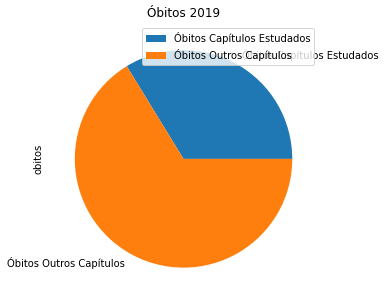

In [16]:
df_pizza = pd.DataFrame({'obitos': [df_2019['soma_obitos_caps'][0], df_2019['obitos_capOutros'][0]]},
             index=['Óbitos Capítulos Estudados', 'Óbitos Outros Capítulos'])
plot = df_pizza.plot.pie(y='obitos', figsize=(5, 5), title="Óbitos 2019")

In [17]:
def plot_grafico_dif(dif, colunas):
    df = pd.DataFrame(np.array([dif, colunas]).T,
                   columns=['dif', 'tx'])

    c = alt.Chart(df, title="Diferença 2019 e anos anteriores").mark_bar().encode(
        alt.Y('tx:N', title='Unidade', sort=None),
        alt.X('dif:Q', title='Diferença'),
        #alt.Order('grupo:N', sort='ascending'),
        alt.Tooltip('dif:Q')
    ).properties(
        width=640,
    ).configure_range(
        category={'scheme': 'set1'}
    )
    
    return c

dif = (df_antes - df_2019)[colunas].values.tolist()[0]
plot_grafico_dif(dif, colunas)

alt.Chart(...)

In [18]:
dif = (df_antes - df_2019)[colunas[1:6]].values.tolist()[0]
plot_grafico_dif(dif, colunas[1:6])

alt.Chart(...)

In [19]:
dif = (df_antes - df_2019)[colunas[8:-1]].values.tolist()[0]
plot_grafico_dif(dif, colunas[8:-1])

alt.Chart(...)

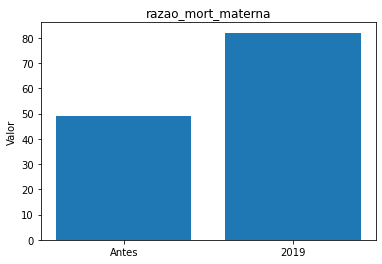

In [20]:
c = 'razao_mort_materna'
plt.title(f"{c}")
periodos = ["Antes", "2019"]
valores = [df_antes[c][0], df_2019[c][0]]
plt.bar(periodos, valores)
plt.ylabel("Valor")
plt.title(f"{c}")
plt.show()

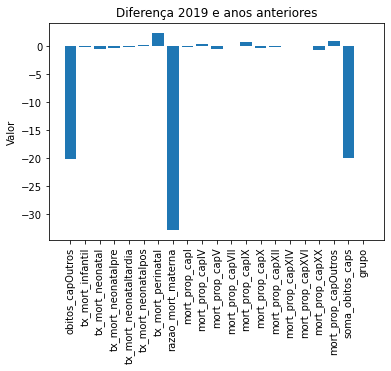

In [21]:
plt.title(f"Diferença 2019 e anos anteriores")
dif = (df_antes - df_2019)[colunas].values.tolist()[0]
plt.bar(colunas, dif)
plt.xticks(rotation=90)
plt.ylabel("Valor")
plt.show()

In [22]:
"""
tarefa 1
3 gráficos -> tx, razao, prop
fazer no altair



tarefa 2 (luciene)
esperar cosme e taynana
arquivo variáveis para tirar duplicidade
eliminar duplicidades dos bancos



tarefa 3
gráfico de pizza -> 100% todas as mortes (dos capítulos)

capítulo 'outros' -> todos os que não foram selecionados
comparar com os outros capítulos selecionados



explorar Streamlit
https://streamlit.io/
"""


"\ntarefa 1\n3 gráficos -> tx, razao, prop\nfazer no altair\n\n\n\ntarefa 2 (luciene)\nesperar cosme e taynana\narquivo variáveis para tirar duplicidade\neliminar duplicidades dos bancos\n\n\n\ntarefa 3\ngráfico de pizza -> 100% todas as mortes (dos capítulos)\n\ncapítulo 'outros' -> todos os que não foram selecionados\ncomparar com os outros capítulos selecionados\n\n\n\nexplorar Streamlit\nhttps://streamlit.io/\n"